In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


np.random.seed(1)

In [3]:
# read data
df = pd.read_csv('../data/preprocessed_models_data.csv')
df.describe()

/tmp/ipykernel_12984/488420508.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Strategic_Subject_List_-_Historical.csv')
/tmp/ipykernel_12984/488420508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SSL SCORE'] = np.where(df['SSL SCORE']<250 , 0, df['SSL SCORE']) # high risk = 1, low risk = 0
/tmp/ipykernel_12984/488420508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SSL SCORE'] = np.where(df['SSL SCOR

,SSL SCORE,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS
count,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000
mean,0.720882,0.020227,0.035916,0.114988,0.162903,0.335752,-0.049534,0.033297
std,0.448566,0.152919,0.210601,0.405583,0.369278,0.837828,0.404900,0.193237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
max,1.000000,4.000000,10.000000,12.000000,1.000000,29.000000,7.300000,4.000000


In [5]:
# Labels are the values we want to predict
labels = np.array(df['SSL SCORE']) # Y
df = df.drop('SSL SCORE', axis = 1)
x_list = list(df.columns) # X
# Convert to numpy array
df = np.array(df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)

# Logistic Regression

In [7]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/home/avasd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted label')

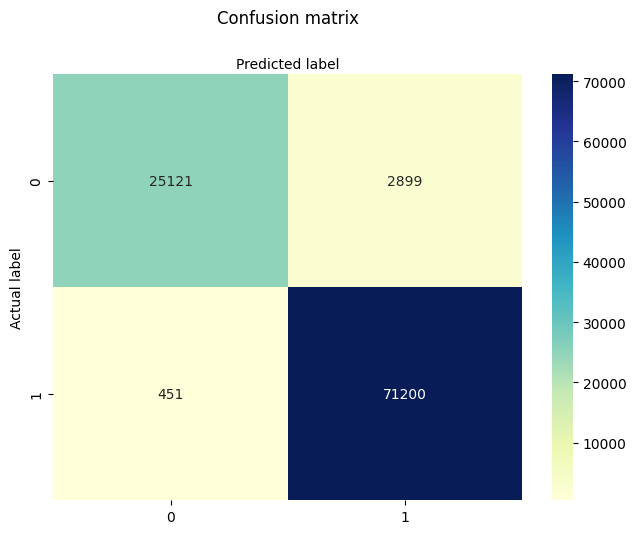

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.98      0.90      0.94     28020
HIGH SSL SCORE       0.96      0.99      0.98     71651

      accuracy                           0.97     99671
     macro avg       0.97      0.95      0.96     99671
  weighted avg       0.97      0.97      0.97     99671

